**Basic Libraries import**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Reading the dataset**

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Number of rows and columns**

In [ ]:
print('Total number of columns and rows\n',df.shape, '\n')

Total number of columns and rows
 (33760, 31) 



**Verification of the existence of null or missing values**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**Variable type in each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

**Statistical information about the variables**

In [ ]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
count,33760.0,33760.0,33760.0,33760.0,33760.0,33760.0,33760.0,33760.0,33760.0,33760.0,...,33760.0,33760.0,33759.0,33759.0,33759.0,33759.0,33759.0,33759.0,33759.0,33759.0
mean,23187.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0
std,12311.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,228.0,0.0
min,0.0,-31.0,-41.0,-31.0,-5.0,-42.0,-23.0,-27.0,-41.0,-7.0,...,-14.0,-20.0,-27.0,-3.0,-7.0,-1.0,-9.0,-10.0,0.0,0.0
25%,11323.0,-1.0,-0.0,0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,7.0,0.0
50%,28260.0,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,21.0,0.0
75%,33557.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0
max,37373.0,2.0,17.0,4.0,13.0,34.0,23.0,37.0,20.0,10.0,...,17.0,23.0,14.0,4.0,6.0,4.0,11.0,6.0,7879.0,1.0


**Statistical information in each class**

In [ ]:
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Non Fraud %  99.69

count    33656.00
mean        83.01
std        227.81
min          0.00
25%          6.99
50%         21.04
75%         75.00
max       7879.42
Name: Amount, dtype: float64


Fraud %     0.31

count     103.00
mean       90.47
std       247.17
min         0.00
25%         1.00
50%         3.76
75%        99.99
max      1809.68
Name: Amount, dtype: float64


**Comparing the amount value of normal transactions versus fraud**

Non Fraud %  99.69
Fraud %     0.31


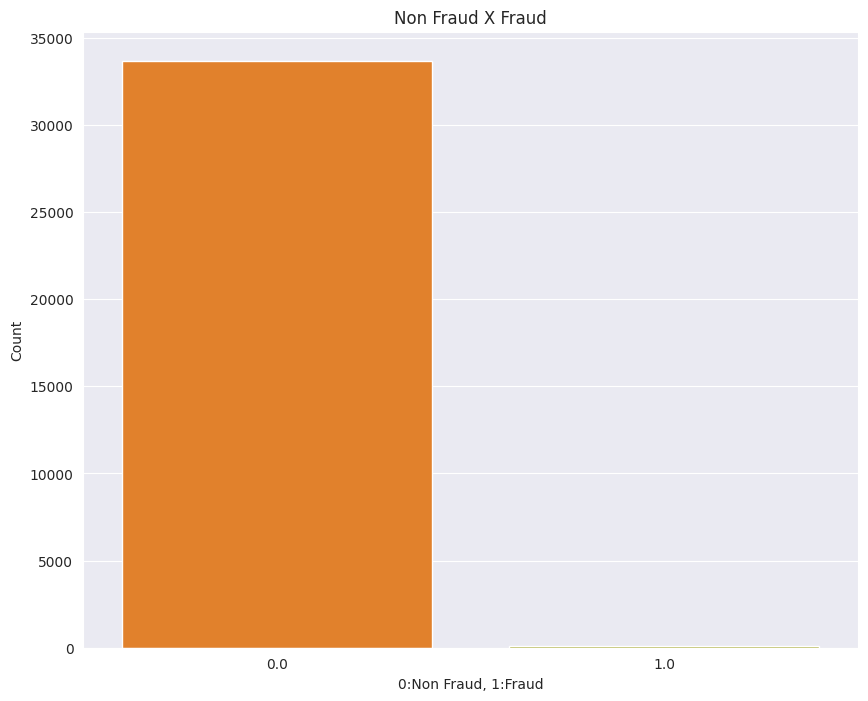

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C1", "C8"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0:Non Fraud, 1:Fraud')
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

In [ ]:
df['V22'] = pd.to_numeric(df['V22'], errors='coerce')

**Separation of input variables from target variable**

In [ ]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [ ]:
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
target

Index(['Class'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target,
                                                    train_size=0.70, test_size=0.30, random_state=1)

**Building the XGBoost Model**

In [ ]:
xg = xgb.XGBClassifier()

In [ ]:
y_train = y_train.dropna()
X_train = X_train.dropna()

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (23631, 29)
y_train shape: (23631, 1)


**Training the Model**

In [ ]:
xg.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Confusion Matrix - Model performance measure**s

In [ ]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [ ]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

**Classification Report - Model performance measures**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

In [ ]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

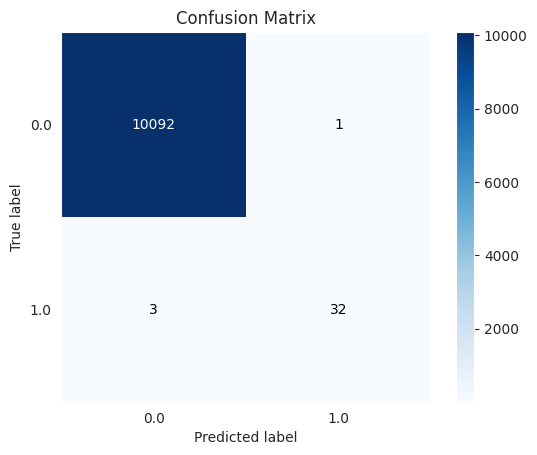

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [ ]:
accuracy_score(y_test, pred)

0.9996050552922591

In [ ]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10093
         1.0       0.97      0.91      0.94        35

    accuracy                           1.00     10128
   macro avg       0.98      0.96      0.97     10128
weighted avg       1.00      1.00      1.00     10128

